In [1]:
! pip3 install imutils

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import imutils

In [2]:
# Moments
img = imutils.url_to_image("https://media.geeksforgeeks.org/wp-content/uploads/star-1-300x168.jpg")
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY);
ret,thresh = cv.threshold(img,127,255,0)
contours,hierarchy = cv.findContours(thresh, 1, 2)
cnt = contours[0]
M = cv.moments(cnt)
print( M )

{'m00': 2165.5, 'm10': 314934.8333333333, 'm01': 192462.8333333333, 'm20': 46288919.25, 'm11': 27991777.041666664, 'm02': 17602511.25, 'm30': 6873544313.450001, 'm21': 4114462792.8166666, 'm12': 2560235861.15, 'm03': 1652658905.45, 'mu20': 487049.3600464389, 'mu11': 1358.9679218307137, 'mu02': 497019.57847174257, 'mu30': -51016.60843372345, 'mu21': 53869.48957848549, 'mu12': 10948.473868325353, 'mu03': -144041.46595287323, 'nu20': 0.10386198078661484, 'nu11': 0.0002897962953351374, 'nu02': 0.10598810335133499, 'nu30': -0.00023378471501688236, 'nu21': 0.0002468581047595911, 'nu12': 5.017161904248159e-05, 'nu03': -0.0006600731428894141}


In [7]:
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])

In [8]:
# Contour Area
area = cv.contourArea(cnt)

In [13]:
# Contour Perimeter
perimeter = cv.arcLength(cnt,True)
print(perimeter)

316.4924201965332


In [11]:
# Contour Approximation
epsilon = 0.1*cv.arcLength(cnt,True)
approx = cv.approxPolyDP(cnt,epsilon,True)

In [14]:
# Convex Hull
hull = cv.convexHull(cnt)
print(hull)

[[[146  46]]

 [[185  76]]

 [[185  77]]

 [[170 123]]

 [[121 123]]

 [[105  76]]

 [[145  46]]]


In [15]:
# Checking Convexity
k = cv.isContourConvex(cnt)
print(k)

False


In [3]:
# Bounding Rectangle
# 7.a. Straight Bounding Rectangle
x,y,w,h = cv.boundingRect(cnt)
cv.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

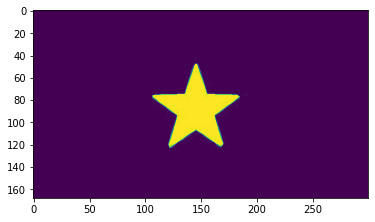

In [5]:
# 7.b. Rotated Rectangle
rect = cv.minAreaRect(cnt)
box = cv.boxPoints(rect)
box = np.int0(box)
img_w_contour = cv.drawContours(img,[box],0,(0,0,255),2)
plt.imshow(img_w_contour)
plt.show()